# Clasificacion binaria con Redes Neuronales

Resolviendo un problema de clasificación binaria. Para ello vamos a utilizar el dataset IMDB movie review sentiment classification. El cual es un dataset que contiene una muestra de 25,000 reseñas de películas de IMDB etiquetadas por sentimiento (positivo/negativo). Adicionalmente, este dataset contiene 10,000 de las palabras más usadas en cada una de las reseñas, estas palabras están guardadas en un catálogo que asigna un índice a cada una de las palabras más empleadas.

## Objetivo
El objetivo de esta práctica es utilizar nuestros conocimientos de normalizado de datos para preparar a este dataset para ser clasificado por una red neuronal que pueda predecir el sentimiento de una nueva reseña.

In [4]:
import numpy as np
from keras import layers, models, optimizers
from keras.datasets import imdb

2024-01-12 21:31:21.129968: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10_000)

25,000 ejemplos de reviews

Los numeros represetan una palabra

In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

1

In [1]:

def convert_number_to_word(example):
    word_index = imdb.get_word_index()
    word_index = dict([(value, key) for (key, value) in word_index.items()])
    print(" ".join([str(word_index.get(_ -3)) for _ in example]))

In [2]:
convert_number_to_word(train_data[0])

NameError: name 'train_data' is not defined

## Normalizando de datos


Antes de continuar con este punto, veamos un poco de contexto del porqué las palabras del dataset han sido guardadas como índices en lugar de utilizar las palabras directamente.

En general en cualquier problema de machine learning/deep learning, nos topamos con que los datos que vamos a utilizar para entrenar a nuestro modelo de inteligencia artificial pueden ser de dos clases:

- **Estructurados:** Datos que tengan forma de fila - columna (similar a una tabla de excel)

- **No estructurados:** Datos que explícitamente NO tengan una forma de fila - columna, cómo lo son: El audio, las imágenes o el texto.

In [10]:
def one_hot_encoding(sequences, dim=10_000):
    results = np.zeros((len(sequences), dim))

    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [11]:
X_train = one_hot_encoding(train_data)
X_test = one_hot_encoding(test_data)

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Arquitectura del Modelo.

Para esta arquitectura veremos un modelo de 2 capa ocultas de 16 neuronas con función de activación relu. Nuestra capa de clasificación solo tendrá 1 neurona, puesto que es suficiente para un problema de clasificación binaria y tendrá una función de activación sigmoid

Finalmente, el modelo será compilado con el optimizador rmsprop y como función de perdida usaremos binary_crossentropy la cual funciona muy bien para problemas de clasificación binaria, y como medida de desempeño usaremos accuracy

In [13]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10_000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

### Entrenamiento del modelo de clasificación binaria

In [15]:
# Crear data de validacion
X_val = X_train[:10_000]
partial_X_train = X_train[10_000:]

In [16]:
# Crear data de validacion
y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

In [17]:
history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5419 - accuracy: 0.7717 - val_loss: 0.4391 - val_accuracy: 0.8331
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3503 - accuracy: 0.8898 - val_loss: 0.3518 - val_accuracy: 0.8646
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2641 - accuracy: 0.9155 - val_loss: 0.2914 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2137 - accuracy: 0.9303 - val_loss: 0.2773 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1786 - accuracy: 0.9433 - val_loss: 0.2839 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1544 - accuracy: 0.9517 - val_loss: 0.2936 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1330 - accuracy: 0.9590 - val_loss: 0.3024 - val_accuracy: 0.8812
Epoch 8/20
30/30 [=

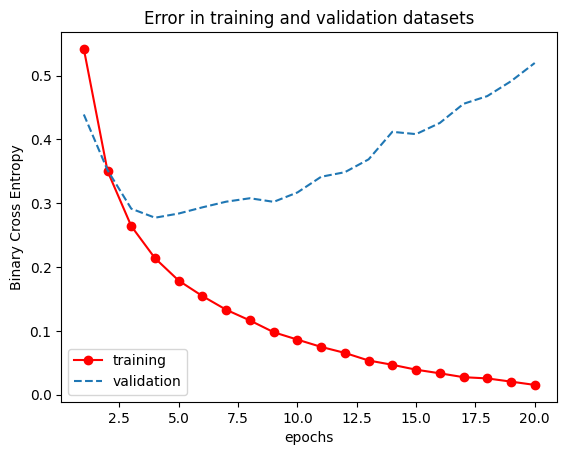

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values) + 1)

plt.plot(epoch, loss_values, 'o-r', label='training')
plt.plot(epoch, val_loss_values, '--', label='validation')
plt.title("Error in training and validation datasets")
plt.ylabel("Binary Cross Entropy")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [19]:
model.evaluate(X_test, y_test)

164/782 [=====>........................] - ETA: 0s - loss: 0.5995 - accuracy: 0.8519

2024-01-12 21:31:33.416808: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 1s 904us/step - loss: 0.5581 - accuracy: 0.8603


[0.5580636858940125, 0.8602799773216248]

## Reducuendo el overfitting

In [20]:
model2 = models.Sequential()

model2.add(layers.Dense(4, activation='relu', input_shape=(10_000, )))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

history2 = model2.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6260 - accuracy: 0.6693 - val_loss: 0.5799 - val_accuracy: 0.6573
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.5363 - accuracy: 0.7888 - val_loss: 0.5274 - val_accuracy: 0.8225
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4891 - accuracy: 0.8489 - val_loss: 0.5036 - val_accuracy: 0.8016
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4553 - accuracy: 0.8790 - val_loss: 0.4815 - val_accuracy: 0.8598
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4293 - accuracy: 0.9041 - val_loss: 0.4702 - val_accuracy: 0.8574
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.4067 - accuracy: 0.9200 - val_loss: 0.4601 - val_accuracy: 0.8657
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3868 - accuracy: 0.9341 - val_loss: 0.4540 - val_accuracy: 0.8714
Epoch 8/20
30/30 [=

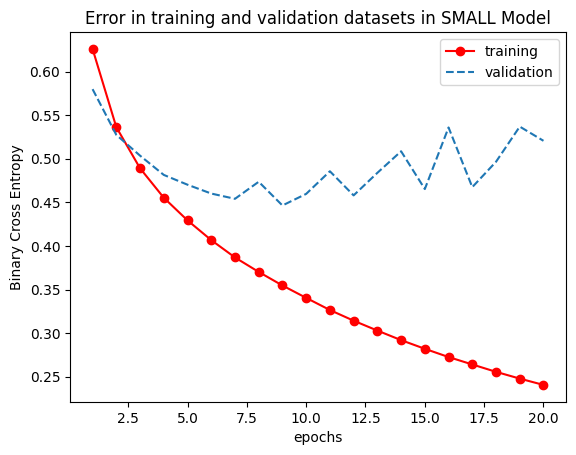

In [21]:
history_dict_2 = history2.history
loss_values_2 = history_dict_2['loss']
val_loss_values_2 = history_dict_2['val_loss']

epoch = range(1, len(loss_values_2) + 1)

plt.plot(epoch, loss_values_2, 'o-r', label='training')
plt.plot(epoch, val_loss_values_2, '--', label='validation')
plt.title("Error in training and validation datasets in SMALL Model")
plt.ylabel("Binary Cross Entropy")
plt.xlabel("epochs")
plt.legend()
plt.show()

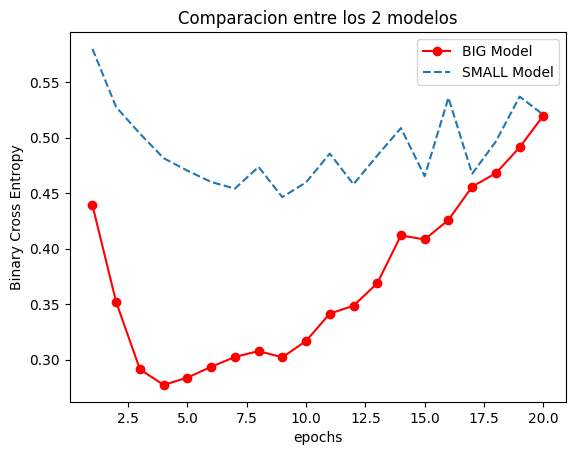

In [22]:
plt.plot(epoch, val_loss_values, 'o-r', label='BIG Model')
plt.plot(epoch, val_loss_values_2, '--', label='SMALL Model')
plt.title("Comparacion entre los 2 modelos")
plt.ylabel("Binary Cross Entropy")
plt.xlabel("epochs")
plt.legend()
plt.show()

## Regularizacion

In [23]:
from keras import regularizers

In [24]:
model3 = models.Sequential()

model3.add(layers.Dense(16, activation='relu', input_shape=(10_000, ), kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

history3 = model3.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5686 - accuracy: 0.7790 - val_loss: 0.4720 - val_accuracy: 0.8362
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3729 - accuracy: 0.8923 - val_loss: 0.4006 - val_accuracy: 0.8569
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3029 - accuracy: 0.9141 - val_loss: 0.3986 - val_accuracy: 0.8526
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2659 - accuracy: 0.9279 - val_loss: 0.3303 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2392 - accuracy: 0.9381 - val_loss: 0.3311 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2201 - accuracy: 0.9482 - val_loss: 0.4040 - val_accuracy: 0.8596
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2061 - accuracy: 0.9528 - val_loss: 0.3665 - val_accuracy: 0.8776
Epoch 8/20
30

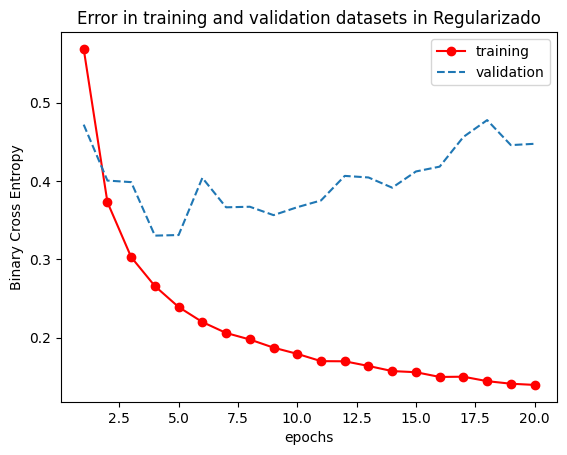

In [25]:
history_dict_3 = history3.history
loss_values_3 = history_dict_3['loss']
val_loss_values_3 = history_dict_3['val_loss']

epoch = range(1, len(loss_values_3) + 1)

plt.plot(epoch, loss_values_3, 'o-r', label='training')
plt.plot(epoch, val_loss_values_3, '--', label='validation')
plt.title("Error in training and validation datasets in Regularizado")
plt.ylabel("Binary Cross Entropy")
plt.xlabel("epochs")
plt.legend()
plt.show()

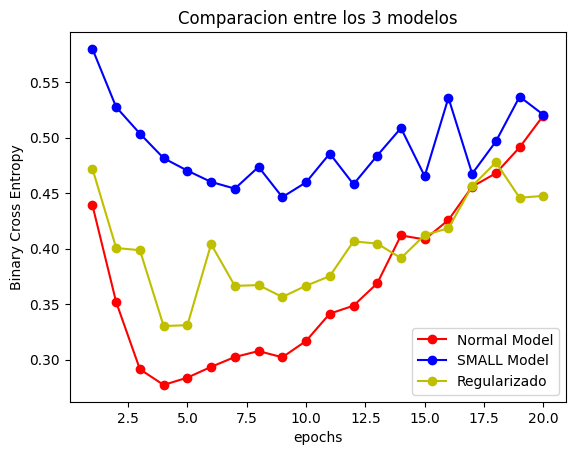

In [26]:
plt.plot(epoch, val_loss_values, 'o-r', label='Normal Model')
plt.plot(epoch, val_loss_values_2, 'o-b', label='SMALL Model')
plt.plot(epoch, val_loss_values_3, 'o-y', label='Regularizado')
plt.title("Comparacion entre los 3 modelos")
plt.ylabel("Binary Cross Entropy")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [27]:
model4 = models.Sequential()

model4.add(layers.Dense(16, activation='relu', input_shape=(10_000, ), kernel_regularizer=regularizers.l1(0.001)))
model4.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

history4 = model4.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 1.1428 - accuracy: 0.7260 - val_loss: 0.7186 - val_accuracy: 0.8351
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.6713 - accuracy: 0.8362 - val_loss: 0.6525 - val_accuracy: 0.8434
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.6138 - accuracy: 0.8524 - val_loss: 0.6081 - val_accuracy: 0.8559
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.5806 - accuracy: 0.8609 - val_loss: 0.5871 - val_accuracy: 0.8580
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.5624 - accuracy: 0.8627 - val_loss: 0.5723 - val_accuracy: 0.8601
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.5468 - accuracy: 0.8679 - val_loss: 0.5563 - val_accuracy: 0.8607
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.5340 - accuracy: 0.8696 - val_loss: 0.5391 - val_accuracy: 0.8700
Epoch 8/20
30/30 [=

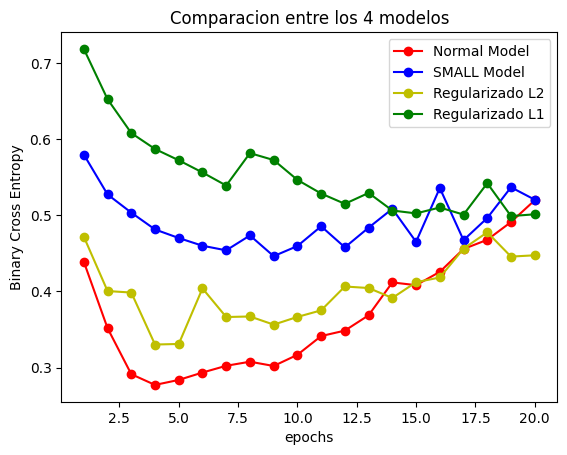

In [28]:
history_dict_4 = history4.history
loss_values_4 = history_dict_4['loss']
val_loss_values_4 = history_dict_4['val_loss']

epoch = range(1, len(loss_values_4) + 1)
plt.plot(epoch, val_loss_values, 'o-r', label='Normal Model')
plt.plot(epoch, val_loss_values_2, 'o-b', label='SMALL Model')
plt.plot(epoch, val_loss_values_3, 'o-y', label='Regularizado L2')
plt.plot(epoch, val_loss_values_4, 'o-g', label='Regularizado L1')
plt.title("Comparacion entre los 4 modelos")
plt.ylabel("Binary Cross Entropy")
plt.xlabel("epochs")
plt.legend()
plt.show()

## DROP OUT

In [29]:
model5 = models.Sequential()

model5.add(layers.Dense(16, activation='relu', input_shape=(10_000, )))
# Aplicacion Drop OUT 50%
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(16, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))

model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

history5 = model5.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6001 - accuracy: 0.6881 - val_loss: 0.4605 - val_accuracy: 0.8543
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.4381 - accuracy: 0.8112 - val_loss: 0.3579 - val_accuracy: 0.8674
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3483 - accuracy: 0.8702 - val_loss: 0.3102 - val_accuracy: 0.8780
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2882 - accuracy: 0.8963 - val_loss: 0.2941 - val_accuracy: 0.8813
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2483 - accuracy: 0.9165 - val_loss: 0.2745 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2123 - accuracy: 0.9303 - val_loss: 0.2850 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1844 - accuracy: 0.9381 - val_loss: 0.2894 - val_accuracy: 0.8884
Epoch 8/20
30/30 [=

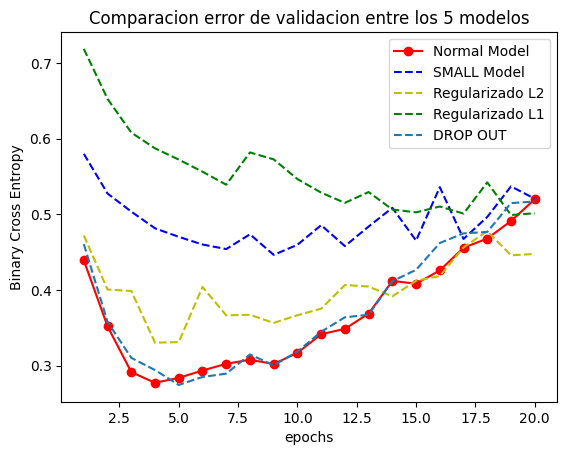

In [36]:
history_dict_5 = history5.history
loss_values_5 = history_dict_5['loss']
val_loss_values_5 = history_dict_5['val_loss']
epoch = range(1, len(loss_values_5) + 1)

# Grafica
plt.plot(epoch, val_loss_values, 'o-r', label='Normal Model')
plt.plot(epoch, val_loss_values_2, '--b', label='SMALL Model')
plt.plot(epoch, val_loss_values_3, '--y', label='Regularizado L2')
plt.plot(epoch, val_loss_values_4, '--g', label='Regularizado L1')
plt.plot(epoch, val_loss_values_5, '--', label='DROP OUT')
plt.title("Comparacion error de validacion entre los 5 modelos")
plt.ylabel("Binary Cross Entropy")
plt.xlabel("epochs")
plt.legend()
plt.show()